# Importar Modulos Necesarios

In [ ]:
# Manejo de vectores y tablas:
import numpy as np 
import pandas as pd 

# Manejo de cadenas de caracteres y regex:
import string as s
import re

# Natural Languaje Toolkit:
import nltk
from nltk.corpus import stopwords

# Herramientas de visualizacion:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Nube de palabras:
from wordcloud import WordCloud

# Modelos de aprendizaje supervisado:
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics  import f1_score, accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Cargar Datos

Tenemos dos archivos con noticias clasificadas en 4 categorias:

1: Noticias del Mundo

2: Deportes

3: Negocios

4: Ciencia y Tecnologia

Los archivos train.cvs y test.csv contienen el texto de la noticia y la etiqueta de la categoria a la que perternecen. Vamos a cargar sus datos en dos dataframes de pandas, entrenamiento y prueba:

In [ ]:
entrenamiento = pd.read_csv("/content/train.csv",
                           header=0,
                           names=['categoria','titular','texto'])

prueba = pd.read_csv("/content/test.csv",
                     header=0,
                     names=['categoria','titular','texto'])

In [ ]:
entrenamiento

,categoria,titular,texto
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [ ]:
# Una noticia de ejemplo:
entrenamiento['texto'][200]


'Computer games can promote problem-solving and team-building in children, say games industry experts.'

In [ ]:
prueba

,categoria,titular,texto
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [ ]:
train_x = entrenamiento.texto
test_x = prueba.texto

train_y = entrenamiento.categoria
test_y = prueba.categoria

In [ ]:
train_x

0         Reuters - Short-sellers, Wall Street's dwindli...
1         Reuters - Private investment firm Carlyle Grou...
2         Reuters - Soaring crude prices plus worries\ab...
3         Reuters - Authorities have halted oil export\f...
4         AFP - Tearaway world oil prices, toppling reco...
                                ...                        
119995     KARACHI (Reuters) - Pakistani President Perve...
119996    Red Sox general manager Theo Epstein acknowled...
119997    The Miami Dolphins will put their courtship of...
119998    PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999    INDIANAPOLIS -- All-Star Vince Carter was trad...
Name: texto, Length: 120000, dtype: object

# Visualizacion de Datos

Podemos visualizar cuantas noticias hay por categoria. Si hubiese muchas menos noticias de una categoria en concreto tendriamos un grupo de datos desequilibrado. En este caso parece que las etiquetas de las noticias estan equilibradas:

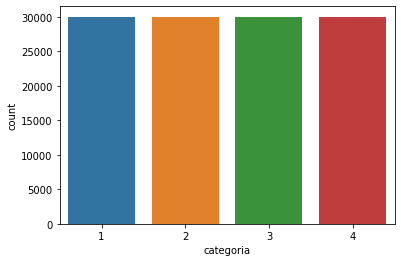

In [ ]:
df = entrenamiento
sns.countplot(x=df.categoria); # Hay un pequeño warning para countplot(df.classid) 

Podemos construir una nube de palabras para la categoria "mundo" y observar que palabras tienen mayor presencia:

In [ ]:
mundo = df.texto[ df.categoria[df.categoria==1].index]

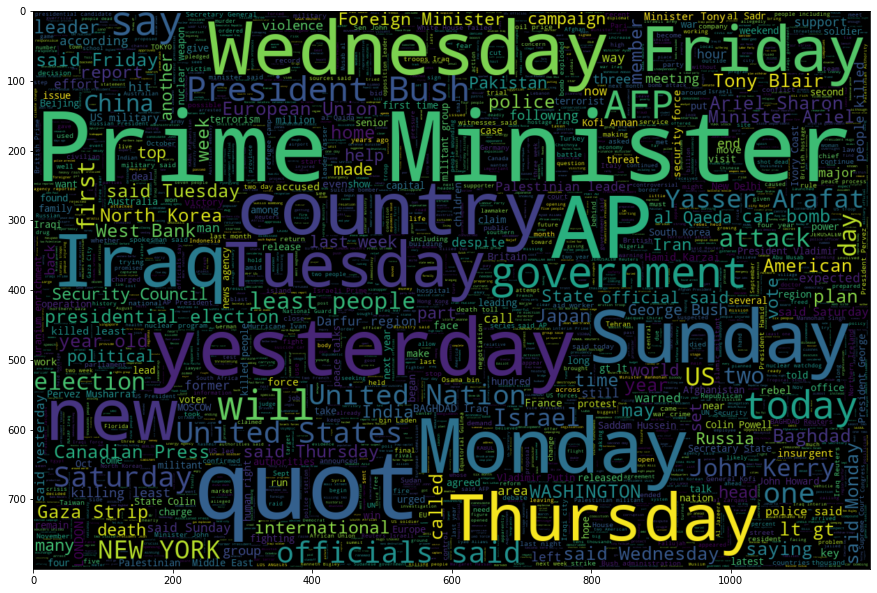

In [ ]:
plt.figure(figsize = (15,20)) ;
nube = WordCloud(min_font_size=3,
                 max_words=2500,
                 width=1200,
                 height=800).generate(" ".join(mundo))

plt.imshow(nube, interpolation='bilinear');

¿Podrias construir las nubes para el resto de categorias? Que las nuebas nubes tengan como maximo 500, 600 y 1000 palabras cada una.

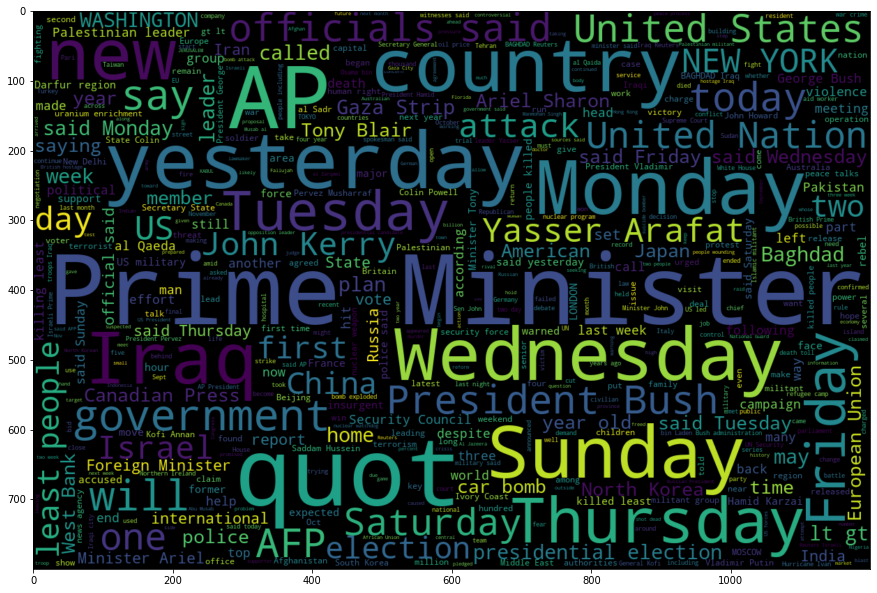

In [ ]:
deportes = df.texto[ df.categoria[df.categoria==2].index]

plt.figure(figsize = (15,20)) ;
nube = WordCloud(min_font_size=3,
                 max_words=500,
                 width=1200,
                 height=800).generate(" ".join(mundo))

plt.imshow(nube, interpolation='bilinear');

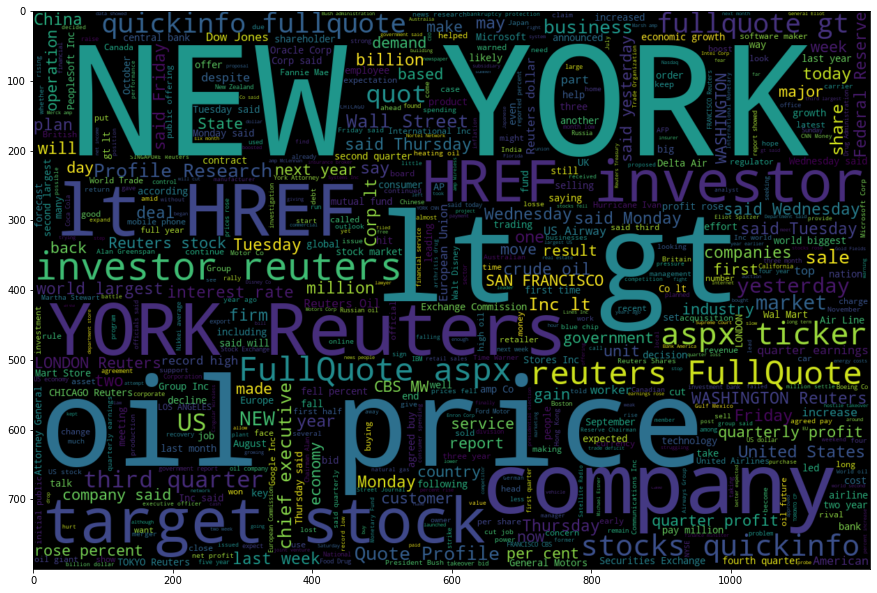

In [ ]:
negocios = df.texto[ df.categoria[df.categoria==3].index]

plt.figure(figsize = (15,20)) ;
nube = WordCloud(min_font_size=3,
                 max_words=600,
                 width=1200,
                 height=800).generate(" ".join(negocios))

plt.imshow(nube, interpolation='bilinear');

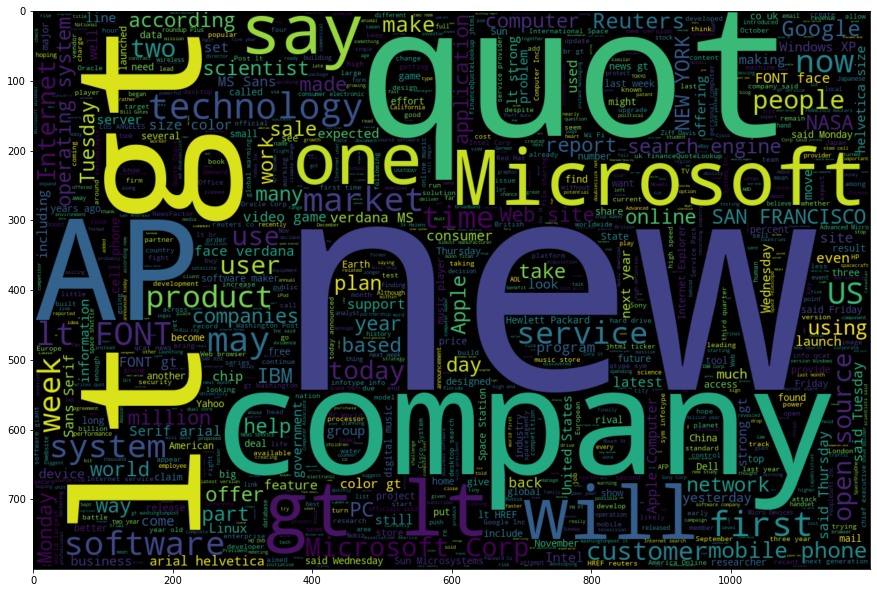

In [ ]:
CyT = df.texto[ df.categoria[df.categoria==4].index]

plt.figure(figsize = (15,20)) ;
nube = WordCloud(min_font_size=3,
                 max_words=1000,
                 width=1200,
                 height=800).generate(" ".join(CyT))

plt.imshow(nube, interpolation='bilinear');

#Tokenizacion

Para que nuestro modelo pueda aprender, debemos limpiar los datos, el primer paso es separar los textos en palabras individuales (tokens, tokenizar).

In [ ]:
def tokenizar(texto):
    tokens =texto.split()
    return tokens

train_x = train_x.apply(tokenizar)
test_x = test_x.apply(tokenizar)

In [ ]:
train_x

0         [Reuters, -, Short-sellers,, Wall, Street's, d...
1         [Reuters, -, Private, investment, firm, Carlyl...
2         [Reuters, -, Soaring, crude, prices, plus, wor...
3         [Reuters, -, Authorities, have, halted, oil, e...
4         [AFP, -, Tearaway, world, oil, prices,, toppli...
                                ...                        
119995    [KARACHI, (Reuters), -, Pakistani, President, ...
119996    [Red, Sox, general, manager, Theo, Epstein, ac...
119997    [The, Miami, Dolphins, will, put, their, court...
119998    [PITTSBURGH, at, NY, GIANTS, Time:, 1:30, p.m....
119999    [INDIANAPOLIS, --, All-Star, Vince, Carter, wa...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[200]

['Computer',
 'games',
 'can',
 'promote',
 'problem-solving',
 'and',
 'team-building',
 'in',
 'children,',
 'say',
 'games',
 'industry',
 'experts.']

# Conversion a minisculas:

El computador confundiria A con a, las palabras en mayusculas al inicio de una frase mantienen el mismos significado (semantica) aunque se representen de manera diferente. Convertimos todas las palabras a caracteres en minuscula.

In [ ]:
def hacer_minusculas(tokens):
    nuevos_tokens=[]
    for t in tokens:
        t = t.lower()
        nuevos_tokens.append(t) 
    return nuevos_tokens

train_x = train_x.apply(hacer_minusculas)
test_x = test_x.apply(hacer_minusculas)

In [ ]:
train_x

0         [reuters, -, short-sellers,, wall, street's, d...
1         [reuters, -, private, investment, firm, carlyl...
2         [reuters, -, soaring, crude, prices, plus, wor...
3         [reuters, -, authorities, have, halted, oil, e...
4         [afp, -, tearaway, world, oil, prices,, toppli...
                                ...                        
119995    [karachi, (reuters), -, pakistani, president, ...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [the, miami, dolphins, will, put, their, court...
119998    [pittsburgh, at, ny, giants, time:, 1:30, p.m....
119999    [indianapolis, --, all-star, vince, carter, wa...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[200]

['computer',
 'games',
 'can',
 'promote',
 'problem-solving',
 'and',
 'team-building',
 'in',
 'children,',
 'say',
 'games',
 'industry',
 'experts.']

# Eliminar Puntuacion

Los simbolos de puntuacion tambien puede hacer que sea mas dificil la compresion del texto para la maquina. Podemos eliminar de cada token los simbolos especiales. Algunos de estos simbolos pueden tener significado, se podria limpiar el texto de cada token de una manera mas elaborada para intentar preservar este significado.

In [ ]:
def eliminar_simbolos(tokens):
    nuevos_tokens = []
    for t in tokens:
        for simbolo in s.punctuation:
            t = t.replace(simbolo, '')
        nuevos_tokens.append(t)
    return nuevos_tokens


train_x = train_x.apply(eliminar_simbolos) 
test_x = test_x.apply(eliminar_simbolos)

Los simbolos de puntuacion estan recogidos en string.punctuation:

In [ ]:
s.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
train_x

0         [reuters, , shortsellers, wall, streets, dwind...
1         [reuters, , private, investment, firm, carlyle...
2         [reuters, , soaring, crude, prices, plus, worr...
3         [reuters, , authorities, have, halted, oil, ex...
4         [afp, , tearaway, world, oil, prices, toppling...
                                ...                        
119995    [karachi, reuters, , pakistani, president, per...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [the, miami, dolphins, will, put, their, court...
119998    [pittsburgh, at, ny, giants, time, 130, pm, li...
119999    [indianapolis, , allstar, vince, carter, was, ...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[200]

['computer',
 'games',
 'can',
 'promote',
 'problemsolving',
 'and',
 'teambuilding',
 'in',
 'children',
 'say',
 'games',
 'industry',
 'experts']

¿De que otras maneras podriamos realizar la limpieza de los simbolos de puntuacion?

In [ ]:

import re, string

def remove_punctuation (train_x ):
  return re.sub('[%s]' % re.escape(string.punctuation), ' ', train_x)



In [ ]:
train_x

0         [reuters, , shortsellers, wall, streets, dwind...
1         [reuters, , private, investment, firm, carlyle...
2         [reuters, , soaring, crude, prices, plus, worr...
3         [reuters, , authorities, have, halted, oil, ex...
4         [afp, , tearaway, world, oil, prices, toppling...
                                ...                        
119995    [karachi, reuters, , pakistani, president, per...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [the, miami, dolphins, will, put, their, court...
119998    [pittsburgh, at, ny, giants, time, 130, pm, li...
119999    [indianapolis, , allstar, vince, carter, was, ...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[200]

['computer',
 'games',
 'can',
 'promote',
 'problemsolving',
 'and',
 'teambuilding',
 'in',
 'children',
 'say',
 'games',
 'industry',
 'experts']

# Eliminar Numeros

La presencia de numeros puede distorsionar el significado. Como tratamiento sencillo se pueden, simplemente, eliminar:

In [ ]:
def eliminar_numeros(tokens):
    sin_numeros = []
    nuevos_tokens = []

    for t in tokens:
        for digito in s.digits:
            t = t.replace(digito, '')
        sin_numeros.append(t)
        
    for t in sin_numeros:
        if t != '':
            nuevos_tokens.append(t)
    return nuevos_tokens

train_x=train_x.apply(eliminar_numeros)
test_x=test_x.apply(eliminar_numeros)

In [ ]:
s.digits

'0123456789'

In [ ]:
train_x

0         [reuters, shortsellers, wall, streets, dwindli...
1         [reuters, private, investment, firm, carlyle, ...
2         [reuters, soaring, crude, prices, plus, worrie...
3         [reuters, authorities, have, halted, oil, expo...
4         [afp, tearaway, world, oil, prices, toppling, ...
                                ...                        
119995    [karachi, reuters, pakistani, president, perve...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [the, miami, dolphins, will, put, their, court...
119998    [pittsburgh, at, ny, giants, time, pm, line, s...
119999    [indianapolis, allstar, vince, carter, was, tr...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[119998]

['pittsburgh',
 'at',
 'ny',
 'giants',
 'time',
 'pm',
 'line',
 'steelers',
 'by',
 'records',
 'steelers',
 'giants',
 'vs',
 'spread',
 'steelers',
 'giants',
 'series',
 'giants',
 'lead',
 'comments',
 'think',
 'the',
 'giants',
 'knew',
 'ben',
 'roethlisberger',
 'was',
 'available',
 'on',
 'draft',
 'day',
 'when',
 'they',
 'broke',
 'the',
 'bank',
 'and',
 'traded',
 'for',
 'eli',
 'manning',
 'all',
 'big',
 'ben',
 'has',
 'done',
 'this',
 'year',
 'is',
 'complete']

# Eliminar Palabras Invariables (Stopwords)

Eliminamos aquellas palabras que carecen de significado propio:

In [ ]:
nltk.download('stopwords')

def quitar_paradas(tokens):
    invariables = stopwords.words('english')
    nuevos_tokens = []
    for t in tokens:
        if t not in invariables:
            nuevos_tokens.append(t)
    return nuevos_tokens

train_x = train_x.apply(quitar_paradas)
test_x = test_x.apply(quitar_paradas)  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
train_x

0         [reuters, shortsellers, wall, streets, dwindli...
1         [reuters, private, investment, firm, carlyle, ...
2         [reuters, soaring, crude, prices, plus, worrie...
3         [reuters, authorities, halted, oil, exportflow...
4         [afp, tearaway, world, oil, prices, toppling, ...
                                ...                        
119995    [karachi, reuters, pakistani, president, perve...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [miami, dolphins, put, courtship, lsu, coach, ...
119998    [pittsburgh, ny, giants, time, pm, line, steel...
119999    [indianapolis, allstar, vince, carter, traded,...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[200]

['computer',
 'games',
 'promote',
 'problemsolving',
 'teambuilding',
 'children',
 'say',
 'games',
 'industry',
 'experts']

# Extraer las Raices

Como las palabras variantes, con significado, pueden tener variantes con el mismo, o similar, significado, podemos extraer las raices de la palabra:

In [ ]:
nltk.download('wordnet')
lematizador = nltk.stem.WordNetLemmatizer()

def lematizar(tokens):
    nuevos_tokens = []
    for t in tokens:
        t = lematizador.lemmatize(t)
        nuevos_tokens.append(t)
    return nuevos_tokens

train_x = train_x.apply(lematizar)
test_x = test_x.apply(lematizar)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
train_x

0         [reuters, shortsellers, wall, street, dwindlin...
1         [reuters, private, investment, firm, carlyle, ...
2         [reuters, soaring, crude, price, plus, worries...
3         [reuters, authority, halted, oil, exportflows,...
4         [afp, tearaway, world, oil, price, toppling, r...
                                ...                        
119995    [karachi, reuters, pakistani, president, perve...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [miami, dolphin, put, courtship, lsu, coach, n...
119998    [pittsburgh, ny, giant, time, pm, line, steele...
119999    [indianapolis, allstar, vince, carter, traded,...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[200]

['computer',
 'game',
 'promote',
 'problemsolving',
 'teambuilding',
 'child',
 'say',
 'game',
 'industry',
 'expert']

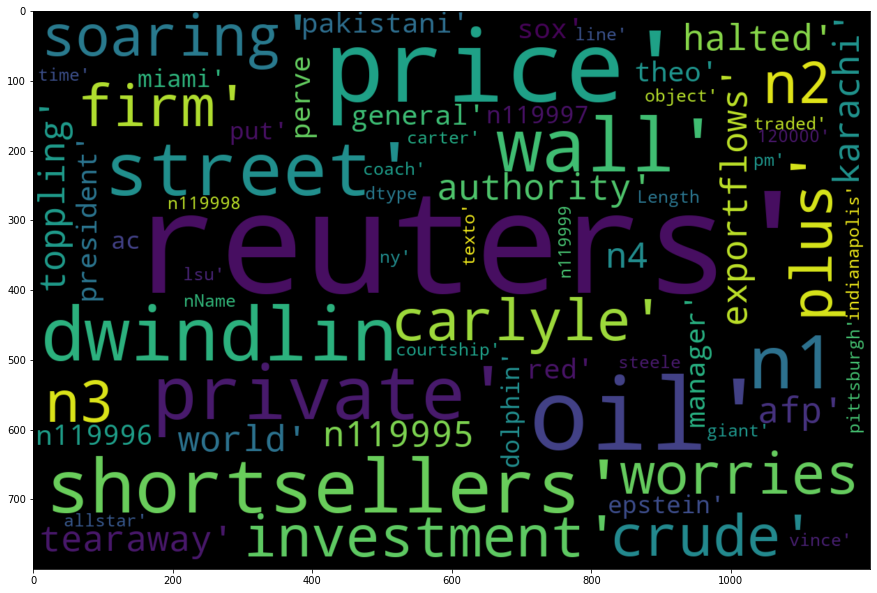

In [ ]:
plt.figure(figsize=(15, 20));
textos_limpios = str(str(train_x).split(','))
nube = WordCloud(min_font_size=3,
                 max_words=2500,
                 width=1200,
                 height=800).generate(textos_limpios)
plt.imshow(nube, interpolation='bilinear');

In [ ]:
textos_limpios

"['0         [reuters', ' shortsellers', ' wall', ' street', ' dwindlin...\\n1         [reuters', ' private', ' investment', ' firm', ' carlyle', ' ...\\n2         [reuters', ' soaring', ' crude', ' price', ' plus', ' worries...\\n3         [reuters', ' authority', ' halted', ' oil', ' exportflows', '...\\n4         [afp', ' tearaway', ' world', ' oil', ' price', ' toppling', ' r...\\n                                ...                        \\n119995    [karachi', ' reuters', ' pakistani', ' president', ' perve...\\n119996    [red', ' sox', ' general', ' manager', ' theo', ' epstein', ' ac...\\n119997    [miami', ' dolphin', ' put', ' courtship', ' lsu', ' coach', ' n...\\n119998    [pittsburgh', ' ny', ' giant', ' time', ' pm', ' line', ' steele...\\n119999    [indianapolis', ' allstar', ' vince', ' carter', ' traded', '...\\nName: texto', ' Length: 120000', ' dtype: object']"

La nube de arriba contiene ciertos elementos que no son palabras y algunos caracteres extra. ¿Podrias limpiar test_x y mostrar su nube de palabras sin estos caracteres?

In [ ]:


import re

string= textos_limpios
new_string= re.sub(r"[\d,-,:,']" ,"",string)
print(new_string)


[         [reuters  shortsellers  wall  street  dwindlin...\n         [reuters  private  investment  firm  carlyle  ...\n         [reuters  soaring  crude  price  plus  worries...\n         [reuters  authority  halted  oil  exportflows ...\n         [afp  tearaway  world  oil  price  toppling  r...\n                                ...                        \n    [karachi  reuters  pakistani  president  perve...\n    [red  sox  general  manager  theo  epstein  ac...\n    [miami  dolphin  put  courtship  lsu  coach  n...\n    [pittsburgh  ny  giant  time  pm  line  steele...\n    [indianapolis  allstar  vince  carter  traded ...\nName texto  Length   dtype object]


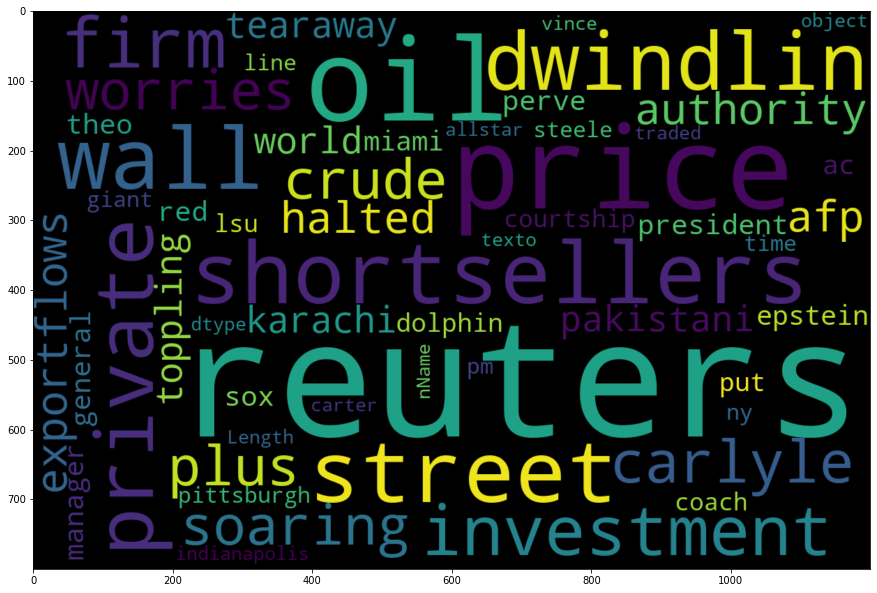

In [ ]:
plt.figure(figsize=(15, 20));
textos_limpios = str(str(train_x).split(','))
nube = WordCloud(min_font_size=3,
                 max_words=2500,
                 width=1200,
                 height=800).generate(new_string)
plt.imshow(nube, interpolation='bilinear');


In [ ]:
del textos_limpios

# Extraccion de Caracteristicas

Es muy complicado hacer que la maquina entienda las palabras a traves de la lectura de sus fonemas o representacion en caracteres. Para ello tenemos que vectorizar (embeber) las palabras completas dentro de su contexto. En este caso utilizaremos una tecnica sencilla de frecuencia de palabras en cada documento:

In [ ]:
train_x = train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x = test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [ ]:
train_x[200]

'computer game promote problemsolving teambuilding child say game industry expert '

In [ ]:
# Para reducir carga de RAM, se puede reducir el numero
# de caracteristicas maximas. N=5000 o 10000
vectorizador = TfidfVectorizer(max_features=5000, min_df=6)

train_1 = vectorizador.fit_transform(train_x)
test_1 = vectorizador.transform(test_x)

print("Numero de caracteristicas extraidas.")
print(len(vectorizador.get_feature_names()))
print(vectorizador.get_feature_names()[:20])

train_arr = train_1.toarray()
test_arr = test_1.toarray()

Numero de caracteristicas extraidas.
5000
['aaron', 'abandon', 'abandoned', 'abbas', 'abbey', 'abc', 'abducted', 'abdullah', 'abidjan', 'ability', 'able', 'aboard', 'abroad', 'absence', 'abu', 'abuja', 'abuse', 'abusing', 'ac', 'academic']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_arr[200]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
train_arr[200]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
np.count_nonzero(train_arr[200])

7

In [ ]:
for i in range(10):
  print(train_x[i])
  print("Indice del maximo: ", np.argmax(train_arr[i]))
  max_pos = np.argmax(train_arr[i])
  print("Valor del maximo: ", train_arr[i][max_pos])
  print("Palabras: ", np.count_nonzero(train_arr[i]))
  print("\n")

reuters shortsellers wall street dwindlingband ultracynics seeing green 
Indice del maximo:  3902
Valor del maximo:  0.6012488505988055
Palabras:  5


reuters private investment firm carlyle groupwhich reputation making welltimed occasionallycontroversial play defense industry quietly placedits bet another part market 
Indice del maximo:  477
Valor del maximo:  0.3621322050075687
Palabras:  14


reuters soaring crude price plus worriesabout economy outlook earnings expected tohang stock market next week depth thesummer doldrums 
Indice del maximo:  4100
Valor del maximo:  0.37796884285397797
Palabras:  13


reuters authority halted oil exportflows main pipeline southern iraq afterintelligence showed rebel militia could strikeinfrastructure oil official said saturday 
Indice del maximo:  3000
Valor del maximo:  0.3854723535880699
Palabras:  15


afp tearaway world oil price toppling record straining wallet present new economic menace barely three month u presidential election 
Indice de

# Ejemplo Classificador: Arbol de Decision

Con las noticias vectorizadas podemos proceder a entrenar un modelo. En este caso un modelo de clasificador en arbol:

In [ ]:
arbol = DecisionTreeClassifier()

# Limitar los ejemplos por si tarda demasiado tiempo:
LIMITAR = True
if LIMITAR:
  N = 10000
  train_arr_cortado = train_arr[0:N]
  train_y_cortado = train_y[0:N]
else:
    train_arr_cortado = train_arr
    train_y_cortado = train_y

arbol.fit(train_arr_cortado, train_y_cortado)
pred = arbol.predict(test_arr)

print("Primeras 20 categorias reales:")
print(test_y.tolist()[:20])
print("Primeras 20 predicciones:")
print(pred.tolist()[:20])

Primeras 20 categorias reales:
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Primeras 20 predicciones:
[3, 4, 4, 2, 4, 3, 4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4]


Podemos evaluar el modelo respecto a varias metricas estadisticas:

In [ ]:
def evaluar_modelo(y, y_pred):
    # Atencion, la puntuacion F1 no es muy determinante en clasificadores
    # multivariable.
    
    print("Puntuacion F1:")
    print(f1_score(y, y_pred, average='micro'))
    print("Precision:")
    print(accuracy_score(y, y_pred))
    print("Precision %:")
    print(round(accuracy_score(y, y_pred)*100, 3), "%")

In [ ]:
etiquetas = ['Mundo', 'Deportes', 'Negocios', 'Ciencia']

def matriz_confusion(test_y, pred, color):
    cof = confusion_matrix(test_y, pred)
    cof = pd.DataFrame(cof, index=[i for i in range(1, 5)],
                       columns=[i for i in range(1, 5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8, 8));

    sns.heatmap(cof, cmap=color, linewidths=1, annot=True, 
                square=True, fmt='d', cbar=False,
                xticklabels=etiquetas, yticklabels=etiquetas);
                
    plt.xlabel("Predicciones");
    plt.ylabel("Realidad");

In [ ]:
evaluar_modelo(test_y, pred)

Puntuacion F1:
0.666578947368421
Precision:
0.666578947368421
Precision %:
66.658 %


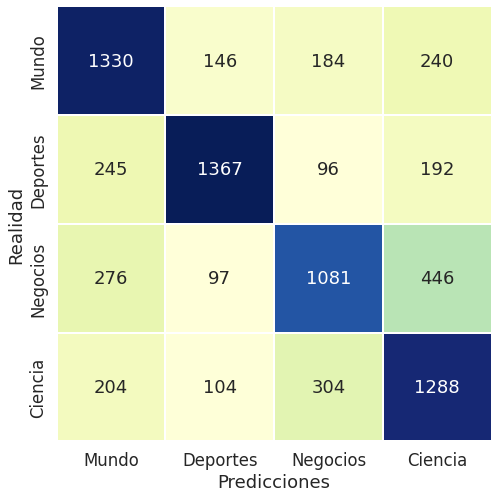

In [ ]:
matriz_confusion(test_y, pred, 'YlGnBu')

Dados los siguientes modelos, ¿podrias entrenarlos y obtener predicciones? 
¿Puedes crear una comparacion de las precisiones de cada uno de los modelos?

Modelos a entrenar y evaluar:

Clasificador Bayesiano: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Clasificador Gausiano: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Descenso de Gradiente Estocastico: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Potenciador de Gradiente Ligero: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html


# Ejemplo Clasificador: Bayes Multinomial


In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
naive_bayes.fit(train_arr, train_y)

predictions = naive_bayes.predict(test_arr)

print("Primeras 60 categorias reales:")
print(test_y.tolist()[:60])
print("Primeras 60 predicciones:")
print(predictions.tolist()[:60])




Primeras 60 categorias reales:
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4, 2, 2, 1, 4, 1, 2, 1, 2, 1, 4, 3, 4, 1, 1, 3, 3]
Primeras 60 predicciones:
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4, 2, 2, 1, 3, 1, 2, 1, 2, 1, 4, 3, 4, 3, 1, 3, 3]


In [ ]:
def evaluar_modelo(test_y, predictions):
    # Atencion, la puntuacion F1 no es muy determinante en clasificadores
    # multivariable.
    
    print("Puntuacion F1:")
    print(f1_score(test_y, predictions, average='micro'))
    print("Precision:")
    print(accuracy_score(test_y, predictions))
    print("Precision %:")
    print(round(accuracy_score(test_y, predictions)*100, 3), "%")

In [ ]:
etiquetas = ['Mundo', 'Deportes', 'Negocios', 'Ciencia']

def matriz_confusion(test_arr, pred, color):
    cof = confusion_matrix(test_y, pred)
    cof = pd.DataFrame(cof, index=[i for i in range(1, 5)],
                       columns=[i for i in range(1, 5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8, 8));

    sns.heatmap(cof, cmap=color, linewidths=1, annot=True, 
                square=True, fmt='d', cbar=False,
                xticklabels=etiquetas, yticklabels=etiquetas);
                
    plt.xlabel("Predicciones");
    plt.ylabel("Realidad");

In [ ]:
evaluar_modelo(test_y, predictions)

Puntuacion F1:
0.8793421052631579
Precision:
0.8793421052631579
Precision %:
87.934 %


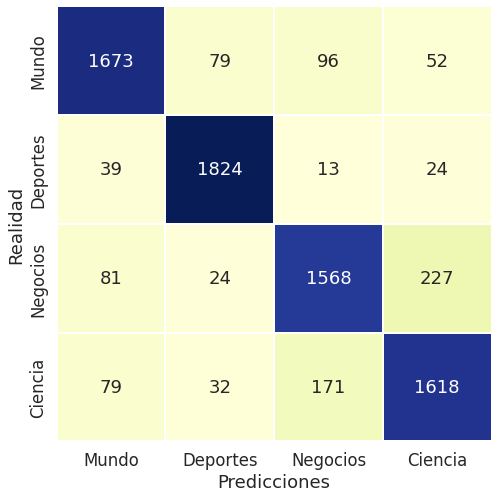

In [ ]:
matriz_confusion(test_y, predictions, 'YlGnBu')

# Ejemplo Clasificador: Gaussiano


In [ ]:
from sklearn.naive_bayes import GaussianNB

clasificador= GaussianNB()
clasificador.fit(train_arr, train_y)

predicciones= clasificador.predict(test_arr)

print("Primeras 60 categorias reales:")
print(test_y.tolist()[:60])
print("Primeras 60 predicciones:")
print(predicciones.tolist()[:60])

Primeras 60 categorias reales:
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4, 2, 2, 1, 4, 1, 2, 1, 2, 1, 4, 3, 4, 1, 1, 3, 3]
Primeras 60 predicciones:
[3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 3, 1, 2, 4, 2, 1, 4, 3, 4, 3, 1, 3, 3]


In [ ]:
def evaluar_modelo(test_y, predicciones):
    # Atencion, la puntuacion F1 no es muy determinante en clasificadores multivariable.
    
    print("Puntuacion F1:")
    print(f1_score(test_y, predicciones, average='micro'))
    print("Precision:")
    print(accuracy_score(test_y, predicciones))
    print("Precision %:")
    print(round(accuracy_score(test_y, predicciones)*100, 3), "%")

In [ ]:
etiquetas = ['Mundo', 'Deportes', 'Negocios', 'Ciencia']

def matriz_confusion(test_arr, predicciones, color):
    cof = confusion_matrix(test_y, predicciones)
    cof = pd.DataFrame(cof, index=[i for i in range(1, 5)],
                       columns=[i for i in range(1, 5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8, 8));

    sns.heatmap(cof, cmap=color, linewidths=1, annot=True, 
                square=True, fmt='d', cbar=False,
                xticklabels=etiquetas, yticklabels=etiquetas);
                
    plt.xlabel("Predicciones");
    plt.ylabel("Realidad");

In [ ]:
evaluar_modelo(test_y, predicciones)

Puntuacion F1:
0.8426315789473684
Precision:
0.8426315789473684
Precision %:
84.263 %


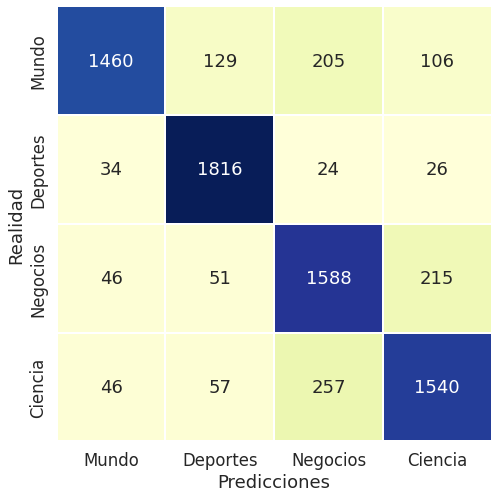

In [ ]:
matriz_confusion(test_y, predicciones, 'YlGnBu')

# Ejemplo Clasificador Gradiente Estocastico

In [ ]:
from sklearn.linear_model import SGDClassifier

clasificadorGE= SGDClassifier(alpha=0.001, max_iter=100)
clasificadorGE.fit(train_arr,train_y)

prediccionesGE= clasificadorGE.predict(test_arr)

print("Primeras 60 categorias reales:")
print(test_y.tolist()[:60])
print("Primeras 60 predicciones:")
print(prediccionesGE.tolist()[:60])

Primeras 60 categorias reales:
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4, 2, 2, 1, 4, 1, 2, 1, 2, 1, 4, 3, 4, 1, 1, 3, 3]
Primeras 60 predicciones:
[3, 4, 4, 2, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 4, 2, 2, 1, 3, 1, 2, 1, 2, 1, 4, 3, 2, 3, 1, 3, 3]


In [ ]:
def evaluar_modelo(test_y, prediccionesGE):
    # Atencion, la puntuacion F1 no es muy determinante en clasificadores multivariable.
    
    print("Puntuacion F1:")
    print(f1_score(test_y, prediccionesGE, average='micro'))
    print("Precision:")
    print(accuracy_score(test_y, prediccionesGE))
    print("Precision %:")
    print(round(accuracy_score(test_y, prediccionesGE)*100, 3), "%")

In [ ]:
etiquetas = ['Mundo', 'Deportes', 'Negocios', 'Ciencia']

def matriz_confusion(test_arr, prediccionesGE, color):
    cof = confusion_matrix(test_y, prediccionesGE)
    cof = pd.DataFrame(cof, index=[i for i in range(1, 5)],
                       columns=[i for i in range(1, 5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8, 8));

    sns.heatmap(cof, cmap=color, linewidths=1, annot=True, 
                square=True, fmt='d', cbar=False,
                xticklabels=etiquetas, yticklabels=etiquetas);
                
    plt.xlabel("Predicciones");
    plt.ylabel("Realidad");

In [ ]:
evaluar_modelo(test_y, prediccionesGE)

Puntuacion F1:
0.8692105263157894
Precision:
0.8692105263157894
Precision %:
86.921 %


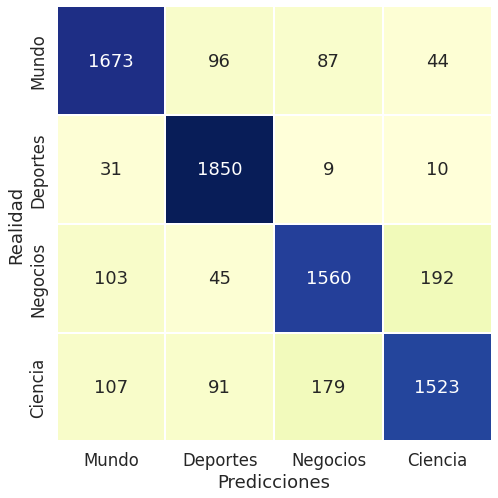

In [ ]:
matriz_confusion(test_y, prediccionesGE, 'YlGnBu')

# Ejemplo Clasificador: Potenciador de Gradiente Ligero

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clasificadorGL=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=100,max_features=5)
clasificadorGL.fit(train_arr, train_y)

prediccionesGL= clasificadorGL.predict(test_arr)

print("Primeras 60 categorias reales:")
print(test_y.tolist()[:60])
print("Primeras 60 predicciones:")
print(prediccionesGL.tolist()[:60])




Primeras 60 categorias reales:
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4, 2, 2, 1, 4, 1, 2, 1, 2, 1, 4, 3, 4, 1, 1, 3, 3]
Primeras 60 predicciones:
[1, 4, 4, 2, 1, 4, 4, 4, 4, 1, 4, 4, 4, 2, 2, 3, 4, 4, 4, 1, 4, 4, 4, 3, 3, 4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 4, 2, 2, 1, 3, 1, 2, 1, 2, 1, 4, 3, 4, 1, 1, 3, 3]


In [ ]:
def evaluar_modelo(test_y, prediccionesGL):
    # Atencion, la puntuacion F1 no es muy determinante en clasificadores multivariable.
    
    print("Puntuacion F1:")
    print(f1_score(test_y, prediccionesGL, average='micro'))
    print("Precision:")
    print(accuracy_score(test_y, prediccionesGL))
    print("Precision %:")
    print(round(accuracy_score(test_y, prediccionesGL)*100, 3), "%")

In [ ]:
etiquetas = ['Mundo', 'Deportes', 'Negocios', 'Ciencia']

def matriz_confusion(test_arr, prediccionesGL, color):
    cof = confusion_matrix(test_y, prediccionesGL)
    cof = pd.DataFrame(cof, index=[i for i in range(1, 5)],
                       columns=[i for i in range(1, 5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8, 8));

    sns.heatmap(cof, cmap=color, linewidths=1, annot=True, 
                square=True, fmt='d', cbar=False,
                xticklabels=etiquetas, yticklabels=etiquetas);
                
    plt.xlabel("Predicciones");
    plt.ylabel("Realidad");

In [ ]:
evaluar_modelo(test_y, prediccionesGL)

Puntuacion F1:
0.7427631578947368
Precision:
0.7427631578947368
Precision %:
74.276 %


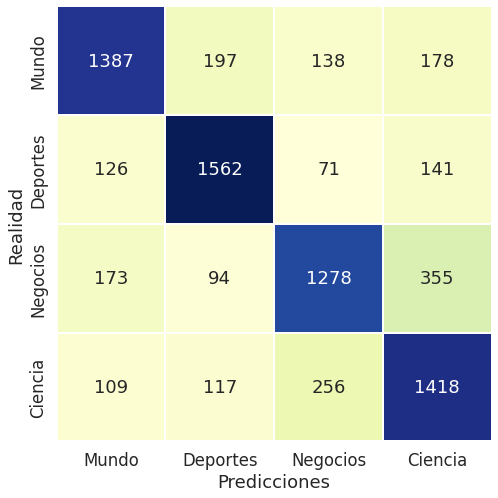

In [ ]:
matriz_confusion(test_y, prediccionesGL, 'YlGnBu')

# Comparación

In [ ]:
d = [ ["Arbol", 0.6665789473, 66.658],
     ["Bayes", 0.87934210526, 87.934],
     ["Gaussiano", 0.84263157894, 84.263],
     ["SGDC", 0.86921052631, 86.921],
     ["GL", 0.74276315789, 74.276]]
     
print ("{:<8} {:<15} {:<10}".format('Metodo','Puntuacion',' Porcentaje'))

for v in d:
    Metodo, Puntuacion, Porcentaje = v
    print ("{:<8} {:<15} {:<10}".format( Metodo, Puntuacion, Porcentaje))

Metodo   Puntuacion       Porcentaje
Arbol    0.6665789473    66.658    
Bayes    0.87934210526   87.934    
Gaussiano 0.84263157894   84.263    
SGDC     0.86921052631   86.921    
GL       0.74276315789   74.276    


Se puede ver en la comparacion que el metodo mas preciso es el metodo de Bayes debido a que que tiene el mayor porcentaje de acierto, por otro lado el peor metodo es el del Arbol de decisones que tiene un porcentaje de precision menor, concretamente de 66%.